In [63]:
scipy.__version__

'1.2.1'

In [11]:
pip install --upgrade scipy

Requirement already up-to-date: scipy in c:\users\91758\appdata\local\continuum\anaconda3\lib\site-packages (1.4.1)
Note: you may need to restart the kernel to use updated packages.


In [10]:
scipy.__version__

'1.4.1'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import cv2
import imageio 
from scipy import misc
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras
%pylab inline
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
root_dir = os.path.abspath('../..')
data_dir = os.path.join(root_dir, '91758')
sub_dir = os.path.join(data_dir, 'Downloads')

In [3]:
# check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)

False

In [4]:
train = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Digits\\train.csv')
test = pd.read_csv('C:\\Users\\91758\\Downloads\\Identify_the_Digits\\test.csv')

In [5]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [6]:
seed = 5
rng = np.random.RandomState(seed)

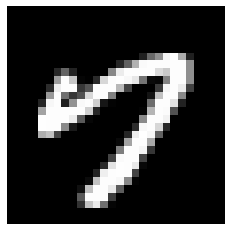

In [7]:
img_name = rng.choice(train.filename)
filepath = os.path.join(root_dir,'Downloads', 'Identify_the_Digits', 'train_digit','train', img_name)

img = imread(filepath)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [8]:
img

array([[[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        ...,
        [0., 0., 0., 1.],
        [0., 0.

In [9]:
temp = []
for img_name in train.filename:
    image_path = os.path.join(root_dir,'Downloads', 'Identify_the_Digits','train_digit','train', img_name)
    img = cv2.imread(image_path,0)
    img = img.flatten().astype('float32')
    temp.append(img)

train_x= np.stack(temp)

In [10]:
train_x.shape

(49000, 784)

In [50]:
#num_pixels= train_x.shape[1]*train_x.shape[2]

In [11]:
train_x = train_x.reshape(-1,28,28,1).astype('float32')
train_x = train_x/255 

train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [12]:
train_x.shape

(49000, 28, 28, 1)

In [13]:
train_y.shape

(49000, 10)

In [14]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [15]:
train_x.shape

(34300, 28, 28, 1)

In [16]:
train_y.shape

(34300, 10)

In [17]:
val_y.shape

(14700, 10)

In [18]:
temp = []
for img_name in test.filename:
    image_path = os.path.join(root_dir,'Downloads', 'Identify_The_Digits' , 'test_Digit', img_name)
    img = cv2.imread(image_path,0)
    img = img.flatten().astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1).astype('float32')

In [19]:
test_x.shape

(21000, 28, 28, 1)

#### Convolutional Neural Network

In [20]:
batch_size = 128
num_classes = 10
epochs = 12

In [21]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28,1), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    #print(model.summary())
    return model1

In [22]:
# build the model
model1 = baseline_model()
# Fit the model
model1.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, verbose=2)
# Final evaluation of the model
scores = model1.evaluate(val_x, val_y, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/12
 - 79s - loss: 0.3367 - accuracy: 0.8956
Epoch 2/12
 - 80s - loss: 0.1131 - accuracy: 0.9666
Epoch 3/12
 - 78s - loss: 0.0805 - accuracy: 0.9764
Epoch 4/12
 - 76s - loss: 0.0631 - accuracy: 0.9800
Epoch 5/12
 - 77s - loss: 0.0546 - accuracy: 0.9823
Epoch 6/12
 - 77s - loss: 0.0458 - accuracy: 0.9848
Epoch 7/12
 - 76s - loss: 0.0377 - accuracy: 0.9877
Epoch 8/12
 - 77s - loss: 0.0341 - accuracy: 0.9886
Epoch 9/12
 - 74s - loss: 0.0318 - accuracy: 0.9892
Epoch 10/12
 - 74s - loss: 0.0297 - accuracy: 0.9904
Epoch 11/12
 - 77s - loss: 0.0259 - accuracy: 0.9910
Epoch 12/12
 - 79s - loss: 0.0243 - accuracy: 0.9916
CNN Error: 1.23%


In [23]:
pred1 = model1.predict_classes(test_x)

In [25]:
pred1= pd.Series(pred1)
pred1[:5]

0    4
1    0
2    9
3    7
4    9
dtype: int64

In [27]:
b= pd.concat([test['filename'], pred1], axis=1)
b.columns=['filename','label']

In [29]:
b.to_csv(os.path.join(root_dir,'Downloads','Identify_The_Digits', 'cnnsolution.csv'), index=False)